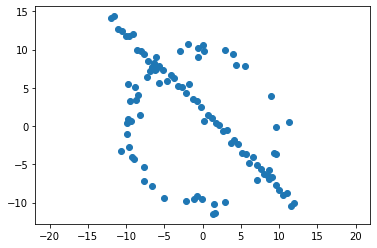

In [11]:
import numpy as np 
from scipy.optimize import minimize 
from scipy import linalg 
import matplotlib.pyplot as plt
# np.random. seed (0)
N = 100
half_n = N//2 
r = 10 
s = r/16 
t = np.random.uniform(0 , 2*np. pi , half_n )
n = s*np.random. randn( half_n ) 
x,y = (r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m,b = -1,2
x=np.linspace(-12,12,half_n) 
y = m*x+b+s*np.random.randn(half_n )
X_line=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X=np.vstack((X_circ,X_line))
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
plt.show()

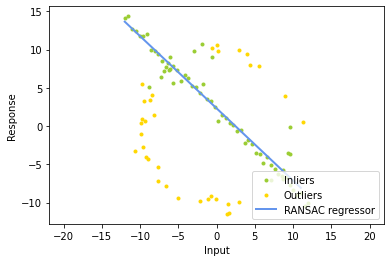

In [32]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model

X1=X[:,0].reshape(-1,1)
X2=X[:,1].reshape(-1,1)
#print(X1)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X1,X2)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X1.min(), X1.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

lw = 2
plt.scatter(X1[inlier_mask], X2[inlier_mask], color="yellowgreen", marker=".", label="Inliers")
plt.scatter(X1[outlier_mask], X2[outlier_mask], color="gold", marker=".", label="Outliers")

plt.plot(line_X,line_y_ransac,color="cornflowerblue",linewidth=lw,label="RANSAC regressor")
plt.axis('equal')
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()